## Gaussian Process Regression algorithm implementation
Code inspired by algorithm detailed on page 19(37) of http://gaussianprocess.org/gpml/chapters/RW.pdf 
some liberties taken from https://www.youtube.com/watch?v=4vGiHC35j9s about one hour in in which Professor Nando de Freitas describes the algorithm framed through a GPR perspective instead of a Linear Algebra one. 

https://www.cs.toronto.edu/~duvenaud/cookbook/#:~:text=Squared%20Exponential%20Kernel&text=The%20SE%20kernel%20has%20become,prior%20has%20infinitely%20many%20derivatives.

Kernel information ^



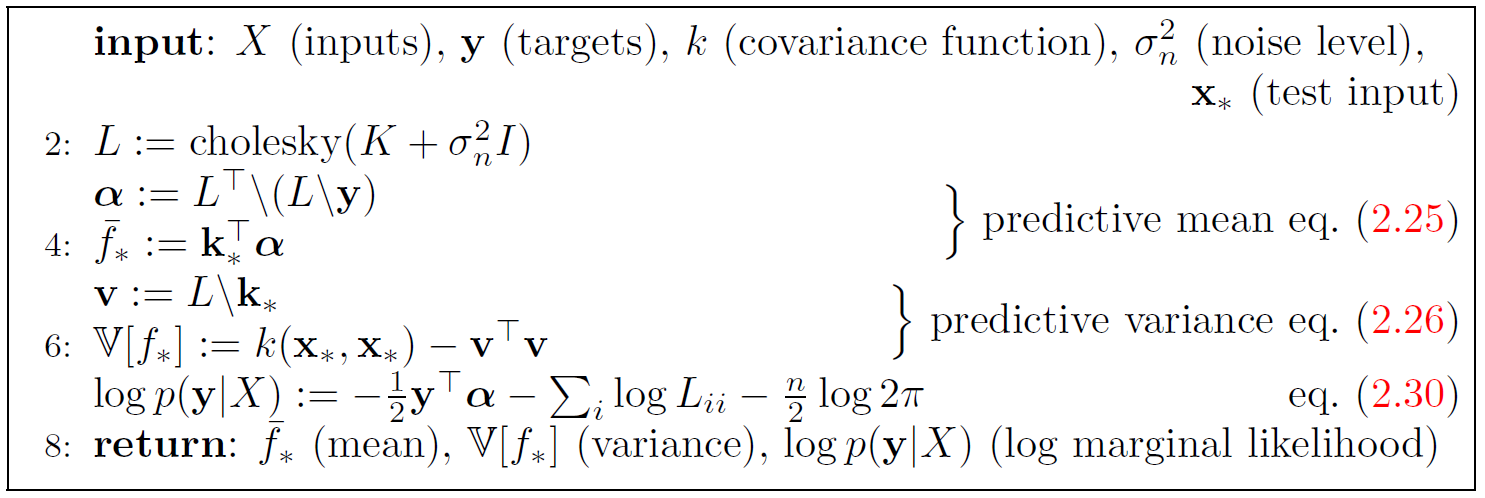

In [2]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [3]:
# This is the true unknown function we are trying to approximate
def f(x):
    y=np.sin(4*x)*np.cos(x).flatten()
    return y

$f(x)=\sin(4x)\cos(x)$

$k_{SE}(x,x′)=σ^2exp(−\frac{(x−x′)^2}{2ℓ^2})$

In [4]:
# General squared exponential Kernal
#Kernal code sourced from link below. I believe they are using a more efficient scheme for caluclating distance between vectors. 
#http://christianherta.de/lehre/dataScience/bayesian/Gaussian_Processes.php
def kernel(a, b):
    lHorizontalSpan = 0.1
    sigmaVertSpan = 1.0
    #reshape(-1, 1) to increase dimension of elements from 1D to 2D
    exponentialTerm = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*(a.dot(b.T))
    return sigmaVertSpan*np.exp(-.5 * (1/lHorizontalSpan) * exponentialTerm)

In [5]:
def GPR(N):
   
    # number of test points.
    n = 300       
    # number of observations/sample etc.... 
    #N = 25
    # noise variance \sigma_n^2.
    sigmaNoise = 0.00005    

    
    #Create N training points- uniform distribution 
    #-------------------------------------------------------
    """
    Each training point is some double stored in a 1x1 array
    X is a 20x1 array filled with data from [-5,5]
    """
    X = np.random.uniform(-5, 5, size=(N,1))    
    #print(X)
    #-------------------------------------------------------


    """ 
    For each training point introduce some noise multiplied by the normal distribution to ensure that
    noise is somewhat controlled
    """
    y=[f(i) + sigmaNoise*np.random.randn(N) for i in X] 
    #print(y)
    #-------------------------------------------------------
    
    #Print out original function and observations as points
    #-------------------------------------------------------
    x = np.arange(-5, 5, 0.1)
    plt.figure(1)
    plt.clf()
    plt.plot(X, y, 'ob', ms=5)
    plt.plot(x,f(x),alpha=0.25)
    #-------------------------------------------------------

    #initalize K 
    K = kernel(X, X)
    #Create some predictions  and shape to 2d Array for algorithm
    X_star = np.linspace(-5, 5, n).reshape(-1,1)


    #======================================================
    """LINE 2"""
    L = la.cholesky(K + sigmaNoise*np.eye(N))     
    #======================================================

    #======================================================
    """LINE 3"""
    # https://www.youtube.com/watch?v=4vGiHC35j9s 1:17:00 explanation for 'm'
    #m=(L^-1)y   
                                                            #swap for la.solve()?
    m=la.inv(L).dot(y)
    #alpha = (L^T)^-1(m) 
    alpha=la.inv(L.T).dot(m)
    #======================================================

    #======================================================
    """LINE 4"""
    k_star=kernel(X, X_star)
    f_star = np.dot(k_star.T, alpha)    #f_star is mu/ average 
    #======================================================

    #======================================================
    """LINE 5"""
    v = la.inv(L).dot(k_star)
    #======================================================

    #======================================================
    """LINE 6"""
    variance=kernel(X_star,X_star)-(v.T.dot(v)) #????????????
    Kfinal = kernel(X_star, X_star)           
  
    plt.plot(X_star, f_star,linestyle='--', dashes=(2, 5));
    plt.title(str(N)+ " Observations");

    return X_star,f_star
   # 


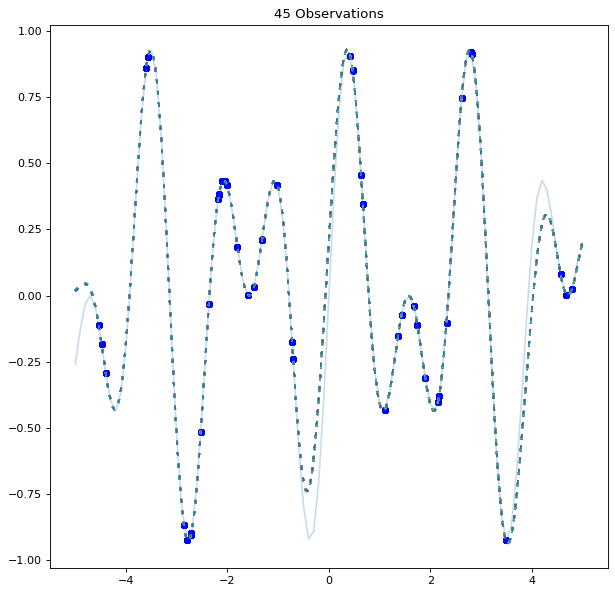

In [7]:
N=45
plt.figure(figsize=(9, 9), dpi=80);
L=GPR(N)
plt.plot(L[0],L[1],linestyle='--', dashes=(2, 5));


In [8]:
import ipywidgets as widgets
#https://www.youtube.com/watch?v=0bNh3kbONXo
#widgets.interact(GPR, N=widgets.Play(min=0,max=40), layout=widgets.Layout(width='150%'));
widgets.interact(GPR, N=(0,40,1));

interactive(children=(IntSlider(value=20, description='N', max=40), Output()), _dom_classes=('widget-interact'…

Here it can be seen that the gaussian process is functioning as intended and fitting the underlying function of the sampled data points with decent accuracy. 

Optimizations could be made to increase compilation speed of algorithm and accuracy of regression scheme in general. 

This experiment is mostly a proof of concept and illustrated the capabilities of support vector machine driven algorithms in the context of regression. 

Algorithm completed early Spring 2022 